In [10]:
from contextlib import closing
import io
import numpy
from copy import deepcopy

from matplotlib import pyplot
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import (
    Activation,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    Input,
    InputLayer,
    MaxPooling2D,
)
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist


In [11]:
# ---------- Prepare data section ---------- #
# load mnist dataset
# x_train, y_train - training dataset and validation vector
# x_test, y_test - validation dataset and validation vector
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# make a deep copy to render data
render_x = deepcopy(x_train)
render_y = deepcopy(y_train)

# declare num of training samples
num_labels = len(numpy.unique(y_train))

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

# convert a single list to categorical list of lists
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

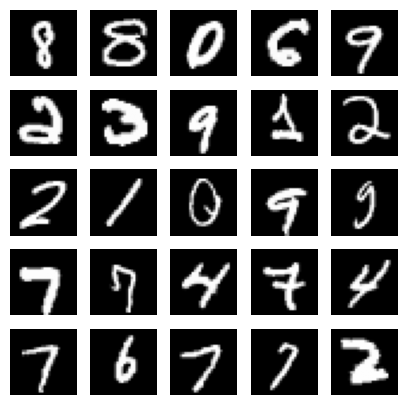

In [12]:
# ----------- Show sample section ---------- #
indexes = numpy.random.randint(0, render_x.shape[0], size=25)
images = render_x[indexes]
labels = render_y[indexes]
# plot the 25 mnist digits
pyplot.figure(figsize=(5,5))
for i in range(len(indexes)):
    pyplot.subplot(5, 5, i + 1)
    image = images[i]
    pyplot.imshow(image, cmap='gray')
    pyplot.axis('off')
pyplot.savefig('samples.png')
pyplot.show()
pyplot.close('all')

In [18]:
# network parameters
BATCH_SIZE = 64
HIDDEN_UNITS = 128
DROPOUT = 0.2
KERNEL_SIZE = 3
POOL_SIZE = 2
FILTERS = 64
EPOCHS = 20
input_shape = (image_size, image_size, 1)

def build_model(units=HIDDEN_UNITS, dropout=DROPOUT, input_size=input_size,
                num_labels=num_labels, kernel_size=KERNEL_SIZE, pool_size=POOL_SIZE,
                filters=FILTERS):

    input_layer = Input(shape=(28, 28, 1))
    x = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(input_layer)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dropout(dropout)(x)
    x = Dense(units, activation='relu')(x)
    x = Dropout(dropout)(x)
    output_layer = Dense(num_labels, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)

    # model = Sequential()
    # model.add(Input(shape=input_shape)),
    # model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))
    # model.add(MaxPooling2D(pool_size))
    # model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))
    # model.add(MaxPooling2D(pool_size))
    # model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu'))
    # model.add(Flatten())
    # # dropout added as regularizer
    # model.add(Dropout(dropout))
    # model.add(Dense(units, activation='relu'))
    # # output layer is 10-dim one-hot vector
    # model.add(Dense(num_labels))
    # model.add(Activation('softmax'))
    return model


model = build_model()

# close file handler at the end of context execution
with closing(io.StringIO()) as fh:
    model.summary(print_fn=lambda x: fh.write(x + "\n"))
    summary_str = fh.getvalue()

# set up image representation
pyplot.figure(figsize=(12, 6))
pyplot.text(0, 1, summary_str, fontsize=12, family='monospace', va='top')
pyplot.axis('off')
# save as PNG
pyplot.savefig('model-summary.png', bbox_inches='tight')
pyplot.close()

In [19]:
# model = load_model('model.keras')

In [20]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE, verbose=0)
#model.save('model.keras')

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7008 - loss: 1.3197
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9470 - loss: 0.1862
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9628 - loss: 0.1229
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9695 - loss: 0.1010
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9725 - loss: 0.0916
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9779 - loss: 0.0771
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9790 - loss: 0.0679
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9818 - loss: 0.0613
Epoch 9/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9817 - loss: 0.0597
Epoch 10/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9843 - loss: 0.0532
Epoch 11/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9851 - loss: 0.0491
Epoch 12/20
938/938 ━━━━━━━━━━

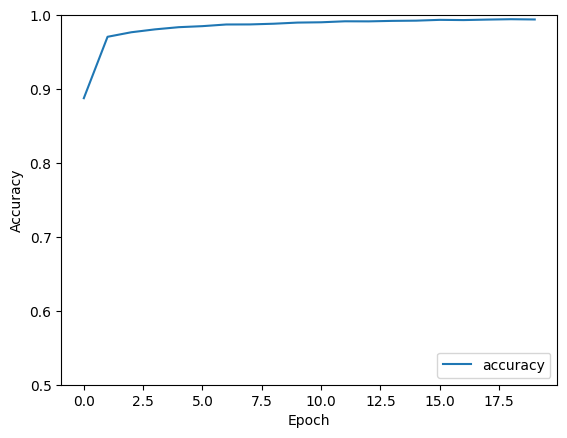

313/313 - 1s - 2ms/step - accuracy: 0.9924 - loss: 0.0308
Final model accuracy: 99.240%


In [77]:
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.ylim([0.5, 1])
pyplot.legend(loc='lower right')
pyplot.savefig("accuracy-history.png")
pyplot.show()
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Final model accuracy: {test_acc*100:.3f}%", )